In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import geopandas
import shapely
import fiona
import geopandas as gp

from datetime import datetime

In [7]:
dataframes = []
for f in os.listdir("fox"):
    print(f)
    df = pd.read_csv(os.path.join("fox", f), parse_dates=[4])
    dataframes.append(df)

fox_df = pd.concat(dataframes)

flying-fox-monitoring-apr-jul-2016.csv
flying-fox-monitoring-apr-jun-2017.csv
flying-fox-monitoring-apr-jun-2018.csv
flying-fox-monitoring-apr-jun-2019.csv
flying-fox-monitoring-jan-mar-2016.csv
flying-fox-monitoring-jan-mar-2017.csv
flying-fox-monitoring-jan-mar-2018.csv
flying-fox-monitoring-jan-mar-2019.csv
flying-fox-monitoring-jul-sep-2017.csv
flying-fox-monitoring-jul-sep-2018.csv
flying-fox-monitoring-jul-sep-2019.csv
flying-fox-monitoring-oct-dec-2016.csv
flying-fox-monitoring-oct-dec-2017.csv
flying-fox-monitoring-oct-dec-2018.csv
flying-fox-monitoring-oct-dec-2019.csv


In [8]:
fox_gdf = gp.GeoDataFrame(fox_df, geometry=geopandas.points_from_xy(fox_df.Longitude, fox_df.Latitude))

fox_gdf.head()

,Name of local government,Name of camp,Latitude,Longitude,Date of survey,Flying-fox absent (true/false),Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox,Total number of all species,EHP camp identification,CSIRO camp identification,geometry
0,Redland,"Alexandra Hills, Lawn Terrace",-27.516490,153.209680,2016-05-20,False,800,200.0,0,0,1000,1,270.0,POINT (153.20968 -27.51649)
1,Southern Downs,Allora (Dalrymple Creek),-28.028018,151.983746,2016-05-20,False,350,0.0,0,0,350,2,271.0,POINT (151.98375 -28.02802)
2,Bundaberg,"Avoca, McCoys Creek",-24.887410,152.229360,2016-05-19,True,0,0.0,0,0,0,238,712.0,POINT (152.22936 -24.88741)
3,Bundaberg,"Bargara, Fairway Drive",-24.823661,152.462227,2016-05-18,True,0,0.0,0,0,0,246,746.0,POINT (152.46223 -24.82366)
4,Bundaberg,"Bargara, Larder Street",-24.831640,152.468890,2016-05-18,True,0,0.0,0,0,0,7,279.0,POINT (152.46889 -24.83164)


In [1]:

colors = 9
cmap = 'plasma'
figsize = (16, 10)
plotvar = 'Name of camp'
scheme = 'equal interval'


ax = fox_gdf.plot(plotvar, figsize=figsize, k = colors, legend=True, color='black')

NameError: name 'fox_gdf' is not defined

In [10]:
zip_file_name = "maps\qld_locality_polygon_shp.zip"
shp_file_name = "QLD_LOCALITY_POLYGON_shp"

In [11]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [12]:
print("unzipping")
map_file = unzip_zipfile(zip_file_name)

print("done")

unzipping
done


In [13]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.head(7)

cols_to_drop = ["QLD_LOCA_1", "QLD_LOCA_3", "QLD_LOCA_4", "QLD_LOCA_6", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(7)



,LC_PLY_PID,DT_CREATE,LOC_PID,QLD_LOCALI,QLD_LOCA_2,QLD_LOCA_5,QLD_LOCA_7,geometry
0,72812,2020-12-03,QLD1670,2017-11-09,LANNERCOST,G,3,"POLYGON ((145.93145 -18.53271, 145.93351 -18.5..."
1,63067,2016-06-29,QLD3331,2018-08-07,BOUNTIFUL ISLANDS,G,3,"POLYGON ((139.84126 -16.70989, 139.84113 -16.7..."
2,63068,2016-06-29,QLD3294,2016-08-10,YARRABAH,G,3,"POLYGON ((145.90111 -16.99426, 145.90094 -16.9..."
3,73313,2020-12-03,QLD3164,2016-08-10,WILSON BEACH,G,3,"POLYGON ((148.70942 -20.46767, 148.71641 -20.4..."
4,73333,2020-12-03,QLD2587,2016-08-10,SCOTCHY POCKET,G,3,"POLYGON ((152.51395 -26.03101, 152.51374 -26.0..."
5,73349,2020-12-03,QLD2374,2017-11-09,PILTON,G,3,"POLYGON ((152.13308 -27.85822, 152.12480 -27.8..."
6,73369,2020-12-03,QLD2261,2017-11-09,OAKENDEN,G,3,"POLYGON ((149.00037 -21.27558, 149.00116 -21.2..."


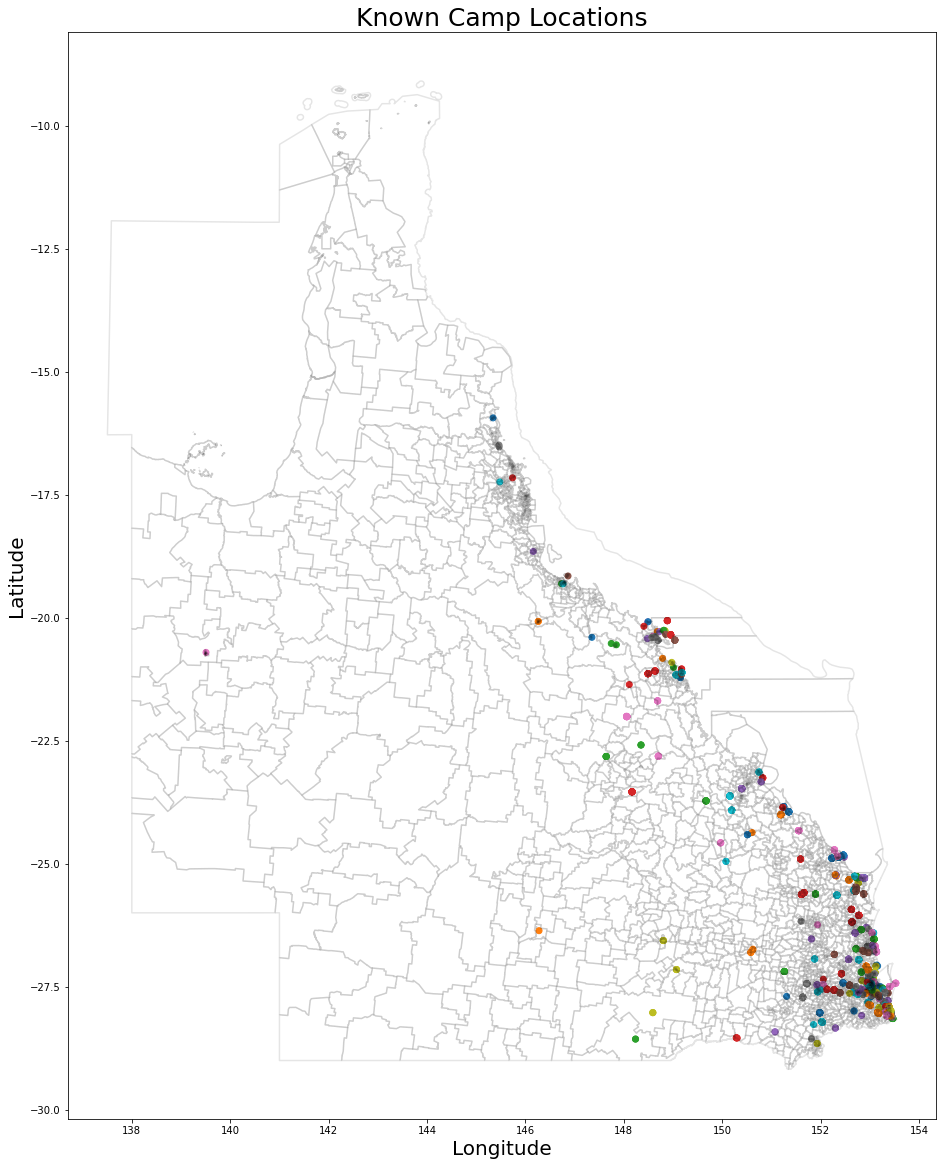

In [14]:
base = burbs.boundary.plot(figsize=(160,20), alpha=0.1, edgecolor='black') 
fox_gdf.plot(plotvar, figsize=(160,20), k = colors, legend=False, ax=base)
plt.title("Known Camp Locations", fontsize=25)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()